<a href="https://colab.research.google.com/github/tlacaelel666/projectalpha1/blob/main/estadusQuantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación Computacional de un Estado Cuántico Básico

Este repositorio contiene un ejemplo sencillo de cómo representar un estado cuántico básico (un qubit) utilizando Python y la librería NumPy. El objetivo es ilustrar la conexión matemática entre los estados base cuánticos $|0⟩$ y $|1⟩$ y su representación como vectores en un entorno de programación clásico.

## Conceptos Clave

*   **Qubit:** La unidad básica de información cuántica. A diferencia de un bit clásico que puede ser 0 o 1, un qubit puede estar en un estado de superposición de $|0⟩$ y $|1⟩$.
*   **Estados Base:** Los estados fundamentales de un qubit, denotados como $|0⟩$ y $|1⟩$. Matemáticamente, se representan como vectores ortonormales. En este ejemplo, utilizamos la representación vectorial estándar:
    *   $|0⟩ = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$
    *   $|1⟩ = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$
*   **Estado Cuántico General:** Un estado cuántico arbitrario de un qubit puede expresarse como una combinación lineal de los estados base:
    $|\psi⟩ = \alpha|0⟩ + \beta|1⟩$
    donde $\alpha$ y $\beta$ son números complejos llamados amplitudes de probabilidad. La suma de los cuadrados de las magnitudes de las amplitudes debe ser igual a 1 ($|\alpha|^2 + |\beta|^2 = 1$) para asegurar que el estado esté normalizado.
*   **Representación Computacional:** Utilizar herramientas de programación clásica (como NumPy en Python) para modelar y manipular las representaciones matemáticas de los estados cuánticos. Esto es fundamental para la simulación de sistemas cuánticos.

## Código

El código en este repositorio realiza los siguientes pasos:

1.  Define variables numéricas (`x`, `y`, `z`, `n`, `w`) que se utilizan para calcular las amplitudes.
2.  Calcula las amplitudes `c0` y `c1` (correspondientes a $\alpha$ y $\beta$) basándose en las variables definidas.
3.  Define las representaciones vectoriales de los estados base $|0⟩$ y $|1⟩$ utilizando arrays de NumPy.
4.  Construye el estado cuántico como una combinación lineal de los estados base utilizando las amplitudes calculadas.
5.  Imprime el estado cuántico resultante.

En el ejemplo proporcionado, con los valores específicos de las variables, las amplitudes resultantes son $c0 = 0$ y $c1 = 1$. Esto lleva a la construcción del estado:

$|\psi⟩ = 0|0⟩ + 1|1⟩ = |1⟩$

El código verifica que esta representación vectorial corresponde al estado $|1⟩$.

## Uso Práctico

Este código es un punto de partida simple para entender cómo se pueden representar los estados cuánticos en un entorno de programación clásico. Puedes modificar las variables iniciales (`x`, `y`, `z`, etc.) para ver cómo cambian las amplitudes `c0` y `c1` y, en consecuencia, cómo se representa el estado cuántico resultante.

**Para ejecutar el código:**

1.  Asegúrate de tener Python instalado.
2.  Instala la librería NumPy si aún no la tienes:

In [13]:
# Definir las variables x,y,z,n,w
x=-1
y=0.5
z=0
n=1
w=-0.5
# Definir coeficientes
c0=(x*z)
c1=(y*2)
print(f"El coeficiente c0 es: ",(c0))
print("El coeficiente c1 es: ",c1)

El coeficiente c0 es:  0
El coeficiente c1 es:  1.0


El coeficiente c0 calculado es: 0
El coeficiente c1 calculado es: 1.0
Estado normalizado:
[[0.+0.j]
 [1.+0.j]]


/tmp/ipython-input-1411432344.py:162: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.yaxis.set_ticklabels(cbar.ax.yaxis.get_ticklabels(), color='green')


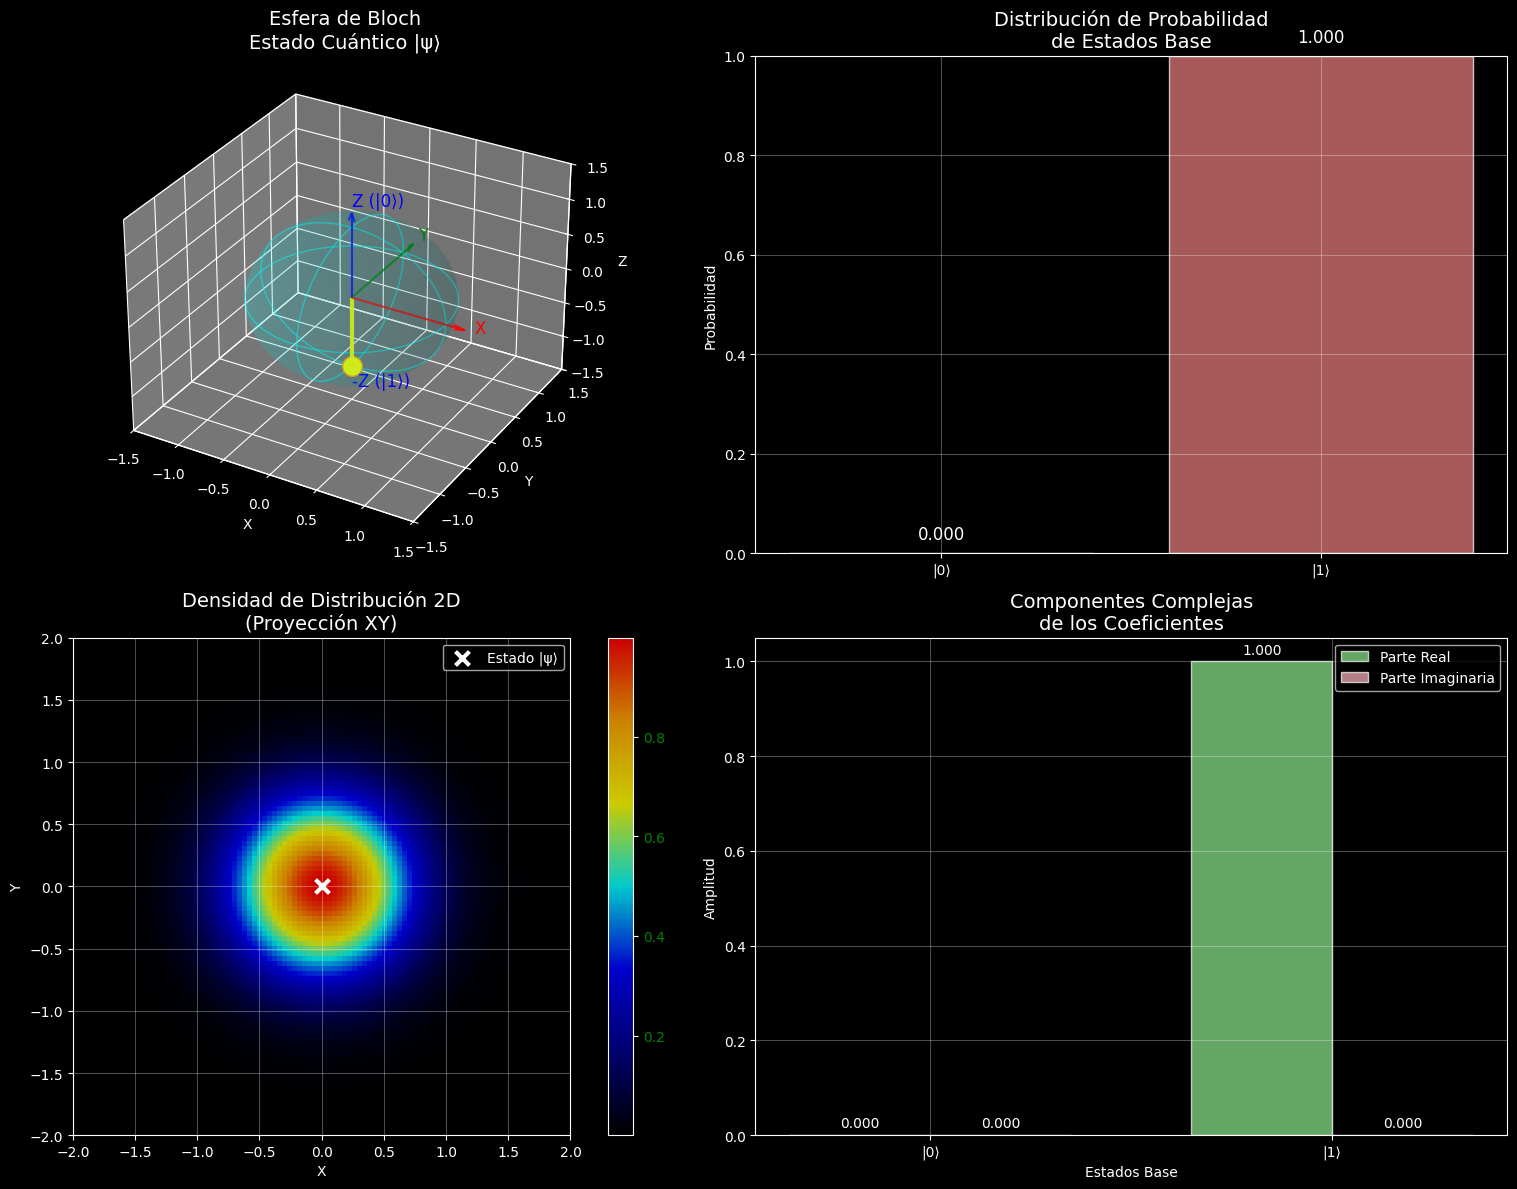


=== INFORMACIÓN DEL ESTADO CUÁNTICO ===
Coordenadas de Bloch: (0.000, 0.000, -1.000)
Probabilidad |0⟩: 0.000
Probabilidad |1⟩: 1.000
Norma del estado: 1.000
Estado normalizado:
[[0.+0.j]
 [1.+0.j]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

# Configurar estilo oscuro
plt.style.use('dark_background')

# 1. Definir las variables del sistema
x = -1
y = 0.5
z = 0
n = 1
w = -0.5

# 2. Definir la "cuantización" para los coeficientes
c0 = (x * z)  # Resultado: 0
c1 = (y * 2)  # Resultado: 1.0
print(f"El coeficiente c0 calculado es: {c0}")
print(f"El coeficiente c1 calculado es: {c1}")

# 3. Definir los estados base
state_0 = np.array([[1], [0]], dtype=complex) # |0>
state_1 = np.array([[0], [1]], dtype=complex) # |1>

# 4. Construir y normalizar el estado cuántico
unnormalized_state = c0 * state_0 + c1 * state_1
norm = np.sqrt(np.abs(c0)**2 + np.abs(c1)**2)
if norm > 0:
    normalized_state = unnormalized_state / norm
else:
    normalized_state = state_1  # Estado |1> por defecto

print(f"Estado normalizado:\n{normalized_state}")

# 5. Calcular coordenadas de la esfera de Bloch
def state_to_bloch_coords(psi):
    """Convierte un estado cuántico a coordenadas de la esfera de Bloch"""
    c0, c1 = psi[0, 0], psi[1, 0]

    # Coordenadas de Bloch usando matrices de Pauli
    x = 2 * np.real(np.conj(c0) * c1)
    y = 2 * np.imag(np.conj(c0) * c1)
    z = np.abs(c0)**2 - np.abs(c1)**2

    return x, y, z

bloch_x, bloch_y, bloch_z = state_to_bloch_coords(normalized_state)

# Crear figura con subplots
fig = plt.figure(figsize=(16, 12))
fig.patch.set_facecolor('black')

# === VISUALIZACIÓN 1: ESFERA DE BLOCH ===
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_facecolor('black')

# Crear esfera
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

# Dibujar esfera translúcida
ax1.plot_surface(x_sphere, y_sphere, z_sphere,
                alpha=0.1, color='cyan', linewidth=0)

# Dibujar círculos de referencia
theta = np.linspace(0, 2*np.pi, 100)
# Ecuador
ax1.plot(np.cos(theta), np.sin(theta), 0, 'cyan', alpha=0.5, linewidth=1)
# Meridiano XZ
ax1.plot(np.cos(theta), 0, np.sin(theta), 'cyan', alpha=0.5, linewidth=1)
# Meridiano YZ
ax1.plot(0, np.cos(theta), np.sin(theta), 'cyan', alpha=0.5, linewidth=1)

# Ejes coordenados
ax1.quiver(0, 0, 0, 1.2, 0, 0, color='red', alpha=0.8, arrow_length_ratio=0.1)
ax1.quiver(0, 0, 0, 0, 1.2, 0, color='green', alpha=0.8, arrow_length_ratio=0.1)
ax1.quiver(0, 0, 0, 0, 0, 1.2, color='blue', alpha=0.8, arrow_length_ratio=0.1)

# Etiquetas de los ejes
ax1.text(1.3, 0, 0, 'X', color='red', fontsize=12)
ax1.text(0, 1.3, 0, 'Y', color='green', fontsize=12)
ax1.text(0, 0, 1.3, 'Z (|0⟩)', color='blue', fontsize=12)
ax1.text(0, 0, -1.3, '-Z (|1⟩)', color='blue', fontsize=12)

# Dibujar el estado cuántico como punto y vector
ax1.scatter([bloch_x], [bloch_y], [bloch_z],
           color='yellow', s=200, alpha=1, edgecolors='orange')
ax1.quiver(0, 0, 0, bloch_x, bloch_y, bloch_z,
          color='yellow', alpha=0.9, arrow_length_ratio=0.1, linewidth=3)

ax1.set_xlabel('X', color='white')
ax1.set_ylabel('Y', color='white')
ax1.set_zlabel('Z', color='white')
ax1.set_title('Esfera de Bloch\nEstado Cuántico |ψ⟩', color='white', fontsize=14)
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_zlim([-1.5, 1.5])

# === VISUALIZACIÓN 2: DISTRIBUCIÓN DE PROBABILIDAD ===
ax2 = fig.add_subplot(222)
ax2.set_facecolor('black')

# Probabilidades de los estados base
prob_0 = np.abs(normalized_state[0, 0])**2
prob_1 = np.abs(normalized_state[1, 0])**2

states = ['|0⟩', '|1⟩']
probabilities = [prob_0, prob_1]
colors = ['lightblue', 'lightcoral']

bars = ax2.bar(states, probabilities, color=colors, alpha=0.7, edgecolor='white')
ax2.set_ylabel('Probabilidad', color='white')
ax2.set_title('Distribución de Probabilidad\nde Estados Base', color='white', fontsize=14)
ax2.set_ylim([0, 1])
ax2.grid(True, alpha=0.3)
ax2.tick_params(colors='white')

# Añadir valores en las barras
for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{prob:.3f}', ha='center', va='bottom', color='white', fontsize=12)

# === VISUALIZACIÓN 3: DENSIDAD DE DISTRIBUCIÓN 2D ===
ax3 = fig.add_subplot(223)
ax3.set_facecolor('black')

# Crear una cuadrícula para la distribución de densidad
x_grid = np.linspace(-2, 2, 100)
y_grid = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Función de densidad gaussiana centrada en el estado
sigma = 0.5
density = np.exp(-((X - bloch_x)**2 + (Y - bloch_y)**2) / (2 * sigma**2))

# Colormap personalizado para fondo oscuro
colors_custom = ['black', 'darkblue', 'blue', 'cyan', 'yellow', 'orange', 'red']
n_bins = 256
custom_cmap = LinearSegmentedColormap.from_list('custom', colors_custom, N=n_bins)

im = ax3.imshow(density, extent=[-2, 2, -2, 2], origin='lower',
                cmap=custom_cmap, alpha=0.8)
ax3.scatter([bloch_x], [bloch_y], color='white', s=100,
           marker='x', linewidth=3, label='Estado |ψ⟩')

ax3.set_xlabel('X', color='white')
ax3.set_ylabel('Y', color='white')
ax3.set_title('Densidad de Distribución 2D\n(Proyección XY)', color='white', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(colors='white')

# Colorbar
cbar = plt.colorbar(im, ax=ax3)
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.yaxis.set_ticklabels(cbar.ax.yaxis.get_ticklabels(), color='green')

# === VISUALIZACIÓN 4: COMPONENTES COMPLEJAS ===
ax4 = fig.add_subplot(224)
ax4.set_facecolor('black')

# Partes real e imaginaria de los coeficientes
real_parts = [np.real(normalized_state[0, 0]), np.real(normalized_state[1, 0])]
imag_parts = [np.imag(normalized_state[0, 0]), np.imag(normalized_state[1, 0])]

x_pos = np.arange(len(states))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, real_parts, width, label='Parte Real',
                color='lightgreen', alpha=0.7, edgecolor='white')
bars2 = ax4.bar(x_pos + width/2, imag_parts, width, label='Parte Imaginaria',
                color='lightpink', alpha=0.7, edgecolor='white')

ax4.set_xlabel('Estados Base', color='white')
ax4.set_ylabel('Amplitud', color='white')
ax4.set_title('Componentes Complejas\nde los Coeficientes', color='white', fontsize=14)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(states)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(colors='white')

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01 if height >= 0 else height - 0.05,
                f'{height:.3f}', ha='center', va='bottom' if height >= 0 else 'top',
                color='white', fontsize=10)

plt.tight_layout()
plt.show()

# Información adicional del estado
print(f"\n=== INFORMACIÓN DEL ESTADO CUÁNTICO ===")
print(f"Coordenadas de Bloch: ({bloch_x:.3f}, {bloch_y:.3f}, {bloch_z:.3f})")
print(f"Probabilidad |0⟩: {prob_0:.3f}")
print(f"Probabilidad |1⟩: {prob_1:.3f}")
print(f"Norma del estado: {np.sqrt(prob_0 + prob_1):.3f}")
print(f"Estado normalizado:\n{normalized_state}")